# Data Preparation

**Author: [Kevin Broløs](https://abzu.ai/team)**

Data Preparation is all about preparing the data to be suitable for the machine learning algorithm of your choice.

That means there's no real one-size-fits-all solution, but it's important to know what to consider in which case.


# The Iris Dataset

This one is quite a boring case, since it's already ready for most machine-learning purposes to carry out a successful classification problem.

In Part two, we'll talk a little bit about it, since we have to treat the target variable a bit to really get a good classifier out of it, doing what's referred to as one-hot-encoding. We will also use a similar process for the MNIST dataset!

But let's take a look at why it's already ready:

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

# Extract the data, target classes and features from the iris dataset
data, feature_names = iris.data, iris.feature_names
target, target_names = iris.target, iris.target_names

## NaN checks

numpy (our data processing friend and python library) refers to missing or invalid values as NaN (Not a Number).

Let's do a check for whether the dataset has NaN values.

In [2]:
# First, check each value if it's nan
isnan = np.isnan(data)

isnan

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
 

This returns the same dataset, but with a True/False indication of whether or not the value is NaN. Of course, this can be a bit hard to read, so let's use another numpy function to simplify the question.

In [3]:
isnan.any()

False

As expected, we have zero NaN values.

## Unique values

We'd usually check for "High Cardinality", that is, a lot of unique values (as compared to the total amount of values) in the dataset.

However, all of the input values in this dataset are continuous, so no need to check for that.

We can still take our one categorical value, the target, and check if it's reasonably well-represented.

In [4]:
# What are the unique values of the target column
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

We can see that the expected three classes are present, and there are 50 of each (so well balanced, and nothing sticking out)

### Outliers

In the [data analysis](01_Data_Analysis.ipynb) part we've already taken a look at the distributions, checked for correlation, and I urged you to take some time to think on whether there were any outliers.

While the statistical formal definition for outliers is based on the distance of the data point from the mean measured in standard deviations - for the most part a good start is using your eyes as we did then.

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We're specifically interested in one of the plots from the [pairplot](01_Data_Analysis.ipynb#The-pairplots-on-select-feature-combinations) previously, namely the Sepal width and Petal width

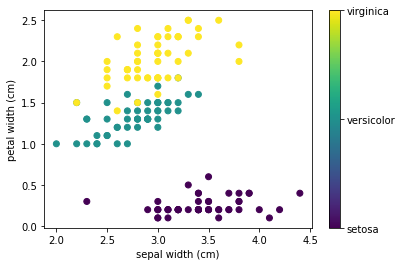

In [6]:
import matplotlib.pyplot as plt

# The indices of the features above we're interested in
x, y = (1, 3)

# Initialize the plot
fig, ax = plt.subplots()

# Plot the scatter
scatter = ax.scatter(data[:, x], data[:, y], c=target)

# Set labels
plt.xlabel(feature_names[x])
plt.ylabel(feature_names[y])

# A function to translate the target indices to string names for the color bar
formatter = plt.FuncFormatter(lambda s, *args: target_names[s])
    
# Add a legend for the colored dots so we can see which class is which
fig.colorbar(scatter, ticks=[0, 1, 2], format=formatter)

plt.show()

The interesting point here is the bottom left one where an iris setosa has a sepal width between 2 and 2.5, which appears to be atypical.

There can be many reasons for this - looking at the petal width, it does **not** appear to be due to a misclassification during data collection. It is more likely that the sepal width has more variance than what it appears in the rest of the samples. 

It could also just be an anomaly, but we will never really know unless we get many more samples of the real world distribution.

While it does appear to be an outlier, I would not in this case handle it separately. It appears to still separate nicely along another dimension from the rest and will likely not influence the resulting model. Even if it does look anomalous, sometimes this just happens - even with datasets that are as well-formed as the iris one.

## Irrelevant attributes

Some of the irrelevant attributes would be caught unique values section. The rest would likely be a domain expertise question. For the iris dataset, it has already been pruned to only contain relevant features, so there's not much to report here.